<a href="https://colab.research.google.com/github/sayem1997/AIPII/blob/master/Assignments/Solution_Tensorflow_Practice2(May_15).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic feed forward neural network 

In [0]:
import tensorflow as tf
import numpy as np
# Eageer Execution 
# : an imperative programming environment that evaluates operations immediately, without building graphs
a = [[2.0]]
m = tf.matmul(a,a)
print("result, {}".format(m))
a = tf.constant([[1,2], [3,4]])
print(a)
b = tf.add(a,1)   # broadcasting
print(b) 
print(a * b) # operator overloading is supported... 
c = np.multiply(a,b)
print(c)
# obtain numpy value from a tensor
print(a.numpy())

result, [[4.]]
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)
[[ 2  6]
 [12 20]]
[[1 2]
 [3 4]]


In [0]:
# dynamic control flow 
def fizzbuzz(max_num):
  counter = tf.constant(0) 
  max_num = tf.convert_to_tensor(max_num)
  for i in range(1, max_num.numpy()+1):
    i = tf.constant(i)
    if int(i % 3) == 0 and int(i % 5) == 0:
      print("fizzbuzz")
    elif int(i % 3) == 0:
      print("fizz")
    elif int(i % 5) == 0:
      print("buzz")
    else:
      print(i.numpy())
    counter += 1

In [0]:
fizzbuzz(15)

1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz


In [0]:
# -*- coding: utf-8 -*-
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np


# 1. MNIST dataset

## 1.1 Download MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist

## 1.2 Understand structure of the MNIST dataset

The MNIST dataset was constructed from two datasets of the US National Institute of Standards and Technology(NIST). The training set consists of handwritten digits from 250 different people, 50 percent high school students, and 50 percent employees from the Census Bureau. 
- change datas into 0~1

In [0]:
print(mnist)

# Split MNIST dataset into 2 part: train, test, validation 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>
11493376/11490434 [==============================] - 0s 0us/step


### Structure of the train set
#### y_train: label vectors for each data
#### x_train: 1-d image vectors for each data

In [0]:
np.shape(x_train)

(60000, 28, 28)

In [0]:
np.shape(y_train)

(60000,)

###Reshape of the train and test data
#### Data shape is (n, 28, 28)
#### For matmul, we should reshape data into (n, 784)
#### For loss function, we should reshape label into (n, 10)

In [0]:
x_train = np.reshape(x_train,(-1,784))
x_test = np.reshape(x_test,(-1,784))

## Exercise 1: Investigate structure of test set

In [0]:
print(np.shape(x_test))
print(np.shape(y_test))
print(np.shape(x_train))
print(np.shape(y_train))

(10000, 784)
(10000,)
(60000, 784)
(60000,)


## 1.3 Visualize images of the MNIST dataset

In [0]:
# Function for visualize a MNIST image.
def visualize_MNIST_image(x, y, index):
    target_label = y[index]
    target_image = x[index].reshape((28,28))
    plt.title('Label: %d'%target_label)
    plt.imshow(target_image, cmap='gray')
plt.show()


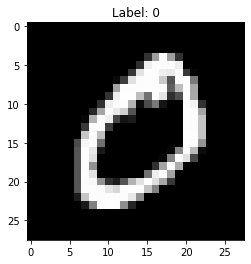

In [0]:
visualize_MNIST_image(x_train, y_train, 1)

# 2. Single layer neural network model

![Computation Graph](https://ml4a.github.io/images/figures/mnist_1layer.png)

## 2.1 Set the variables
### Set the hyper-parameters for neural network model

In [0]:
learning_rate = 0.05 # Training speed
num_of_epoch = 20  # Training period  from 20 ~ 50 
# batch_size = 30  # how many image sent to a model at a once.. 


## 2.2 Define single layer neural network and cross entropy loss function
#### Numerical expression for the neural network: y = softmax(x ⋅ W + b)

In [0]:
model = tf.keras.Sequential([tf.keras.layers.Dense(10,activation='softmax')])

optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 2.4 Train the model's parameter W and b with gradient descent

In [0]:
model.fit(x_train, y_train, epochs=num_of_epoch)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4819 - accuracy: 0.8730
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3382 - accuracy: 0.9052
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3150 - accuracy: 0.9116
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3029 - accuracy: 0.9153
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.9165
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2893 - accuracy: 0.9189
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2851 - accuracy: 0.9207
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2814 - accuracy: 0.9217
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2786 - accuracy: 0.9223
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.275

## 2.5 Evaluate the model's performance

In [0]:
print(np.mean(np.equal(model.predict_classes(x_test,verbose=1),y_test)))

313/313 [==============================] - 0s 1ms/step
0.9244


## 2.6 Visualize trained weight matrix W

(784, 10)
(10,)


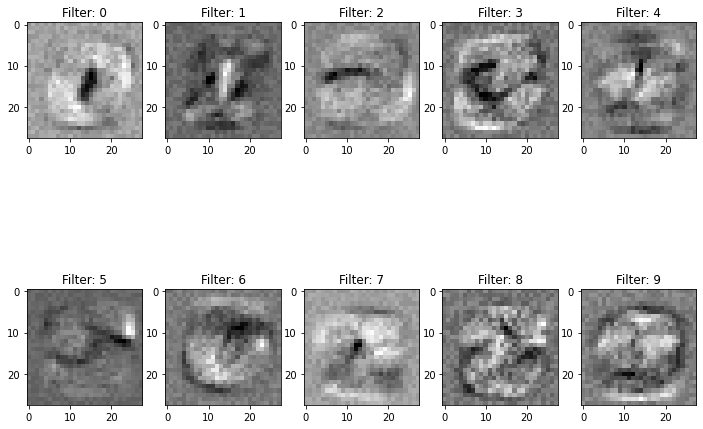

In [0]:
# Get value of the weight matrix W
print(model.layers[0].get_weights()[0].shape)
# Get value of the bias B
print(model.layers[0].get_weights()[1].shape)

W = model.layers[0].get_weights()[0]
plt.figure(figsize=(12, 9))
for i in range(10):
    W_i = W[:,i].reshape((28,28))
    plt.subplot(2, 5, i+1)
    plt.title('Filter: %d'%i)
    plt.imshow(W_i, cmap='gray')

plt.show()